In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print(len(data.train.labels))
print(len(data.test.labels))
print(len(data.validation.labels))

55000
10000
5000


In [4]:
print(data.test.labels[0:5,:])
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


array([7, 2, 1, 0, 4], dtype=int64)

In [5]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

In [6]:
def plot_images(images, cls_true, cls_pred=None):
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = 'TC : ' + str(cls_true[i])
        else:
            xlabel = 'TC : ' + str(cls_true[i])+'; Pred '+str(cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

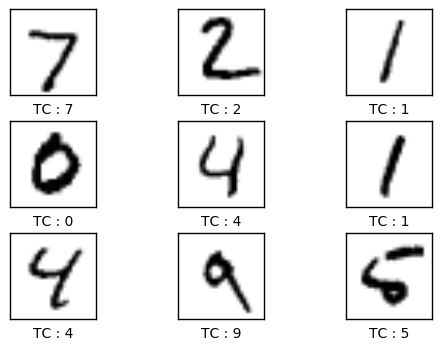

In [7]:
sample_images = data.test.images[0:9]
sample_true_cls = data.test.cls[0:9]
plot_images(sample_images, sample_true_cls, None)

In [8]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [9]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
bias = tf.Variable(tf.zeros([num_classes]))

In [10]:
logits = tf.add(tf.matmul(x, weights), bias)

In [11]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [12]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
batch_size = 100

In [15]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [16]:
def optimize(num_iter):
    for i in range(num_iter):
        x_batch, y_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_batch}
        session.run(optimizer, feed_dict=feed_dict_train)

In [17]:
feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}

In [18]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print(acc)

def run_all(num_iter):
    optimize(num_iter)
    print_accuracy()

In [19]:
run_all(1000)

0.9172


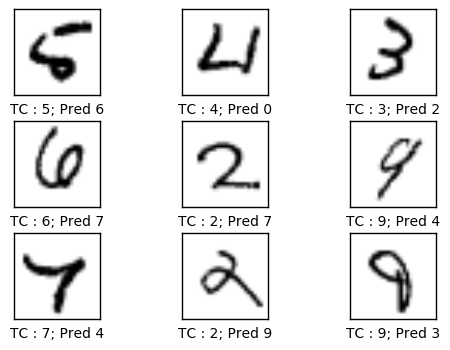

In [20]:
def print_wrong_classified():
    correct, cls = session.run([correct_prediction, y_pred_cls], feed_dict= feed_dict_test)
    incorrect = (correct == False)
    images_incorrect = data.test.images[incorrect]
    labels_incorrect = data.test.cls[incorrect]
    pred_incorrect = cls[incorrect]
    plot_images(images_incorrect[0:9], labels_incorrect[0:9], pred_incorrect[0:9])

print_wrong_classified()